# A look at Airbnb and housing in NYC

A frequently used keyword in the startup culture is “disrupt,” and while these entrepreneurial ventures benefit many by empowering their audience by creating additional sources of income they also cause disturbances in the surrounding economic ecosystems. Airbnb has been viewed as a rival to the hotel industry and the hotel industry has striked back with claims of how detrimental Airbnb can be to cities in terms of physically and financially displacing residents. Below I ask the following questions and further inquire on the plots.

1. What types of properties in NYC are available on Airbnb from 2015-2017?
2. What are the room types available in NYC on Airbnb from 2015-2017?
3. Number of allowable guests to be accommodated per property 2015-2017?
4. Which NYC zipcodes are popular Airbnb locations?
5. What ranges are Airbnb prices in NYC zipcodes?
6. What does Airbnb availability look like in a few zipcodes?
7. What do price to rent ratios look like in a few zipcodes?


In [26]:
%matplotlib inline

import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [289]:
#Read in CSV data files
airbnb = pd.read_csv('zip_clean.csv',index_col=0)
bydz_availcount = pd.read_csv('bydz_availcount.csv',header=None)
bydz_availcount.columns=['date_zip','avail_count']
bydzrt_roomcount = pd.read_csv('bydzrt_roomcount.csv',header=None)
bydzrt_roomcount.columns=['date_zip','room_type','date','bydzrt_count']
prr_df = pd.read_csv('prr_df.csv',index_col=0)
mlp_df = pd.read_csv('mlp_df.csv',index_col=0)
air_zillow = pd.read_csv('airzillow_df.csv', index_col=0)

/Users/Administrator/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## 1. What types of properties in NYC are available on Airbnb from 2015-2017?

As seen below, an overwhelming number of NYC properties on Airbnb are apartments. This makes sense as NYC is regarded as having [the highest population density in the United States (27,000+ people/sq. mile).](https://www1.nyc.gov/site/planning/data-maps/nyc-population/population-facts.page) However, it is interesting to note that Airbnb locations in NYC have more to offer than just apartments, houses, and lofts.

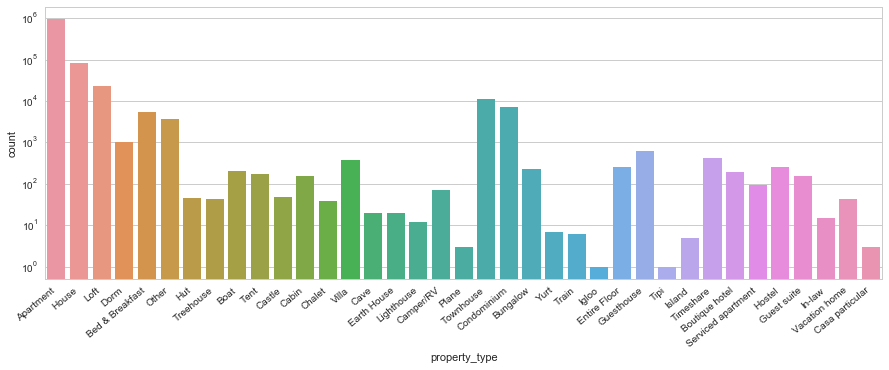

In [75]:
#Look at cumulative NYC Airbnb's property types from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
g = sns.countplot(x="property_type", data=airbnb)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
mpl.rcParams['figure.figsize'] = (20,15)
plt.yscale('log', nonposy='clip')
plt.show()


Taking a closer look at apartments in particular, there hasn't been drastic growth for Airbnb apartment property offerings. A rough estimation of the linear growth would be about 400 apartment listings/month.

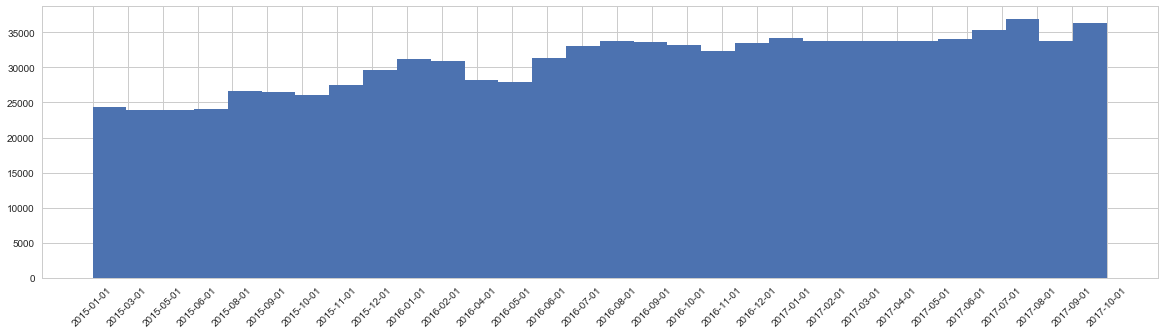

In [194]:
apartments = airbnb.loc[airbnb['property_type'] == 'Apartment']['date']
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.hist(apartments, bins=30)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

House listings on Airbnb have also experienced growth in NYC but at a much slower pace. A rough estimation of the linear growth would be about 70 house listings/month.

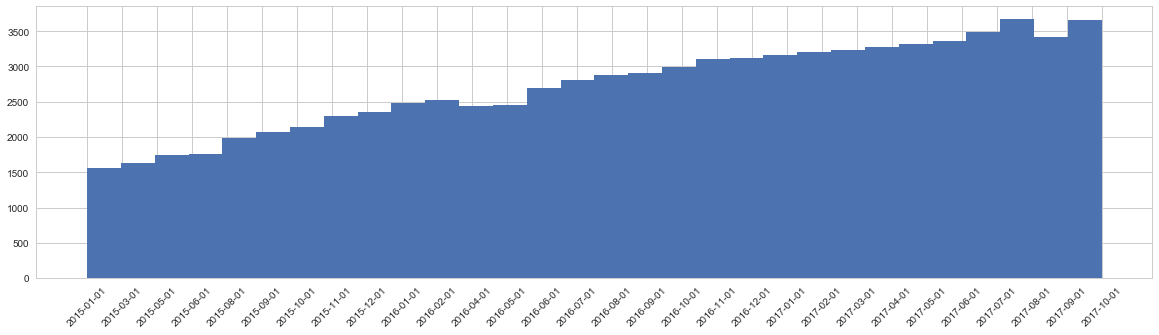

In [195]:
houses = airbnb.loc[airbnb['property_type'] == 'House']['date']
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.hist(houses, bins=30)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

## 2. What are the room types available in NYC on Airbnb from 2015-2017?

The room types for Airbnb listings include: Entire home/apt, Private room, and Shared room. As seen in the figures below, this trend stays true for both apartments and houses. Since most of the listings are Entire home/apt or Private rooms, the data suggests that hosts either have extra space in their places or have bought an extra property that they do not live in. Hosts may also value their own privacy as well as their guests.

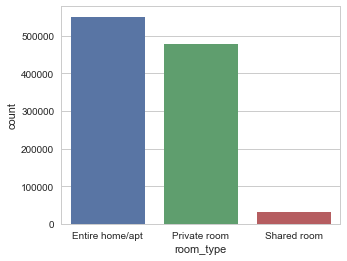

In [154]:
#NYC Airbnb's roomtypes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="room_type", data=airbnb)
mpl.rcParams['figure.figsize'] = (9,5)
plt.show()

### All Room Types Offered between 2015-2017 separated by Year

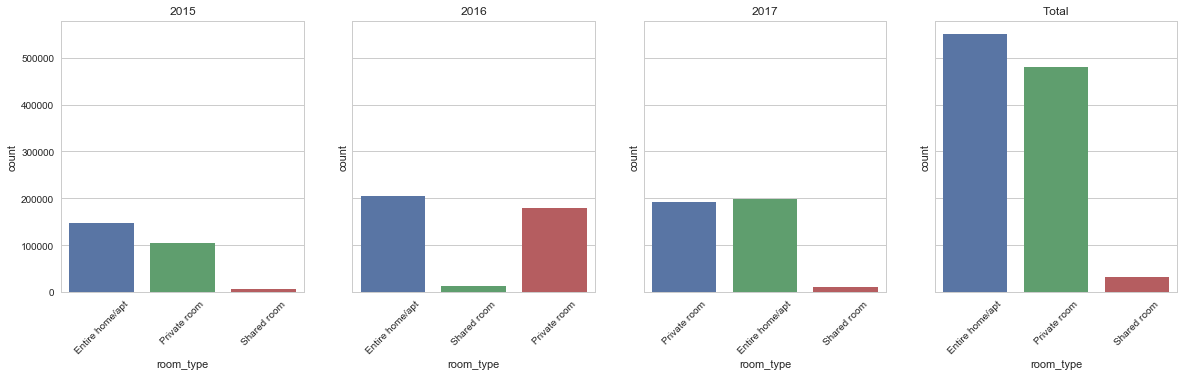

In [181]:
#NYC Airbnb's roomtypes from 2015-2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5),sharey=True)

sns.set(style="whitegrid", color_codes=True)
airbnb2015 = airbnb.loc[airbnb['year'] == 2015]
ax1.set_title("2015")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=airbnb2015, ax=ax1)
airbnb2016 = airbnb.loc[airbnb['year'] == 2016]
ax2.set_title("2016")
ax2.set_xticklabels(['Entire home/apt', 'Private room', 'Shared room'],rotation = 45)
sns.countplot(x="room_type", data=airbnb2016, ax=ax2)
airbnb2017 = airbnb.loc[airbnb['year'] == 2017]
sns.countplot(x="room_type", data=airbnb2017, ax=ax3)
ax3.set_title("2017")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=airbnb, ax=ax4)
ax4.set_title("Total")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 45)

# plt.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )
# mpl.rcParams['figure.figsize'] = (9,5)

plt.show()

### Apartment Room Types Offered between 2015-2017 separated by Year

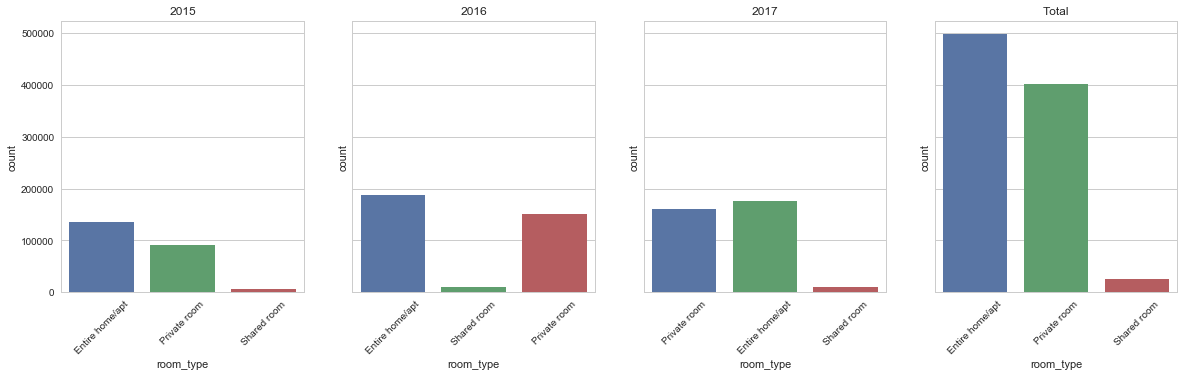

In [210]:
fig = plt.figure()
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5),sharey=True)

apartments = airbnb.loc[airbnb['property_type'] == 'Apartment']
sns.set(style="whitegrid", color_codes=True)
apartments2015 = apartments.loc[apartments['year'] == 2015]
ax1.set_title("2015")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=apartments2015, ax=ax1)
apartments2016 = apartments.loc[apartments['year'] == 2016]
ax2.set_title("2016")
ax2.set_xticklabels(['Entire home/apt', 'Private room', 'Shared room'],rotation = 45)
sns.countplot(x="room_type", data=apartments2016, ax=ax2)
apartments2017 = apartments.loc[apartments['year'] == 2017]
sns.countplot(x="room_type", data=apartments2017, ax=ax3)
ax3.set_title("2017")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=apartments, ax=ax4)
ax4.set_title("Total")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 45)


plt.show()

### House Room Types Offered between 2015-2017 separated by Year

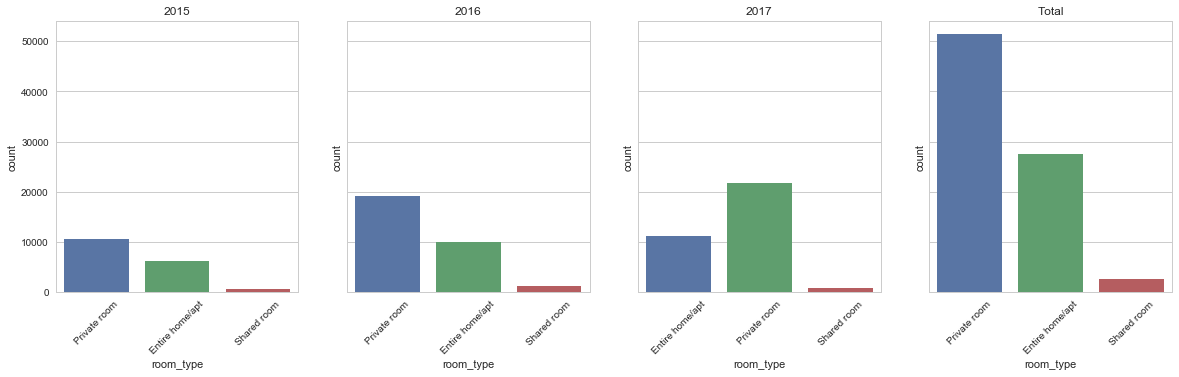

In [212]:
fig = plt.figure()
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5),sharey=True)

houses = airbnb.loc[airbnb['property_type'] == 'House']
sns.set(style="whitegrid", color_codes=True)
houses2015 = houses.loc[houses['year'] == 2015]
ax1.set_title("2015")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=houses2015, ax=ax1)
houses2016 = houses.loc[houses['year'] == 2016]
ax2.set_title("2016")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
sns.countplot(x="room_type", data=houses2016, ax=ax2)
houses2017 = houses.loc[houses['year'] == 2017]
sns.countplot(x="room_type", data=houses2017, ax=ax3)
ax3.set_title("2017")
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 45)
sns.countplot(x="room_type", data=houses, ax=ax4)
ax4.set_title("Total")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 45)
plt.show()

## 3. Number of allowable guests to be accommodated per property 2015-2017?

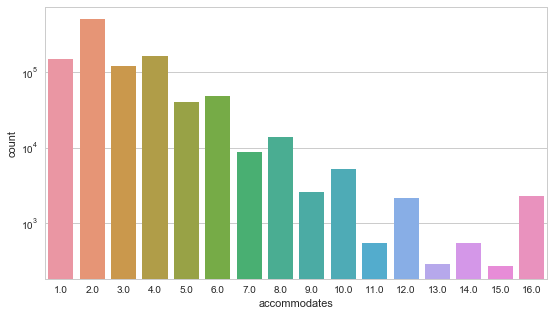

In [78]:
#Look at how many people all NYC Airbnb's from 2015-2017 period accommodate
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='accommodates', data=airbnb)
mpl.rcParams['figure.figsize'] = (8,2)
plt.yscale('log', nonposy='clip')
plt.show()


Below is a boxplot of the accomodation capacities by zipcode. Noticeably, zipcode 10307 has the longest box which denotes that that area has a comparatively larger range of offerings for Airbnb customers planning group trips. Zipcode 10309's box starts at a relatively higher number than other zipcodes. Both zipcode 10307 and 10309 are in the South Shore of Staten Island, which is much more suburban than other parts of NYC and generally has more houses than apartments, so it is understandable that these areas would be more accomodating for groups.

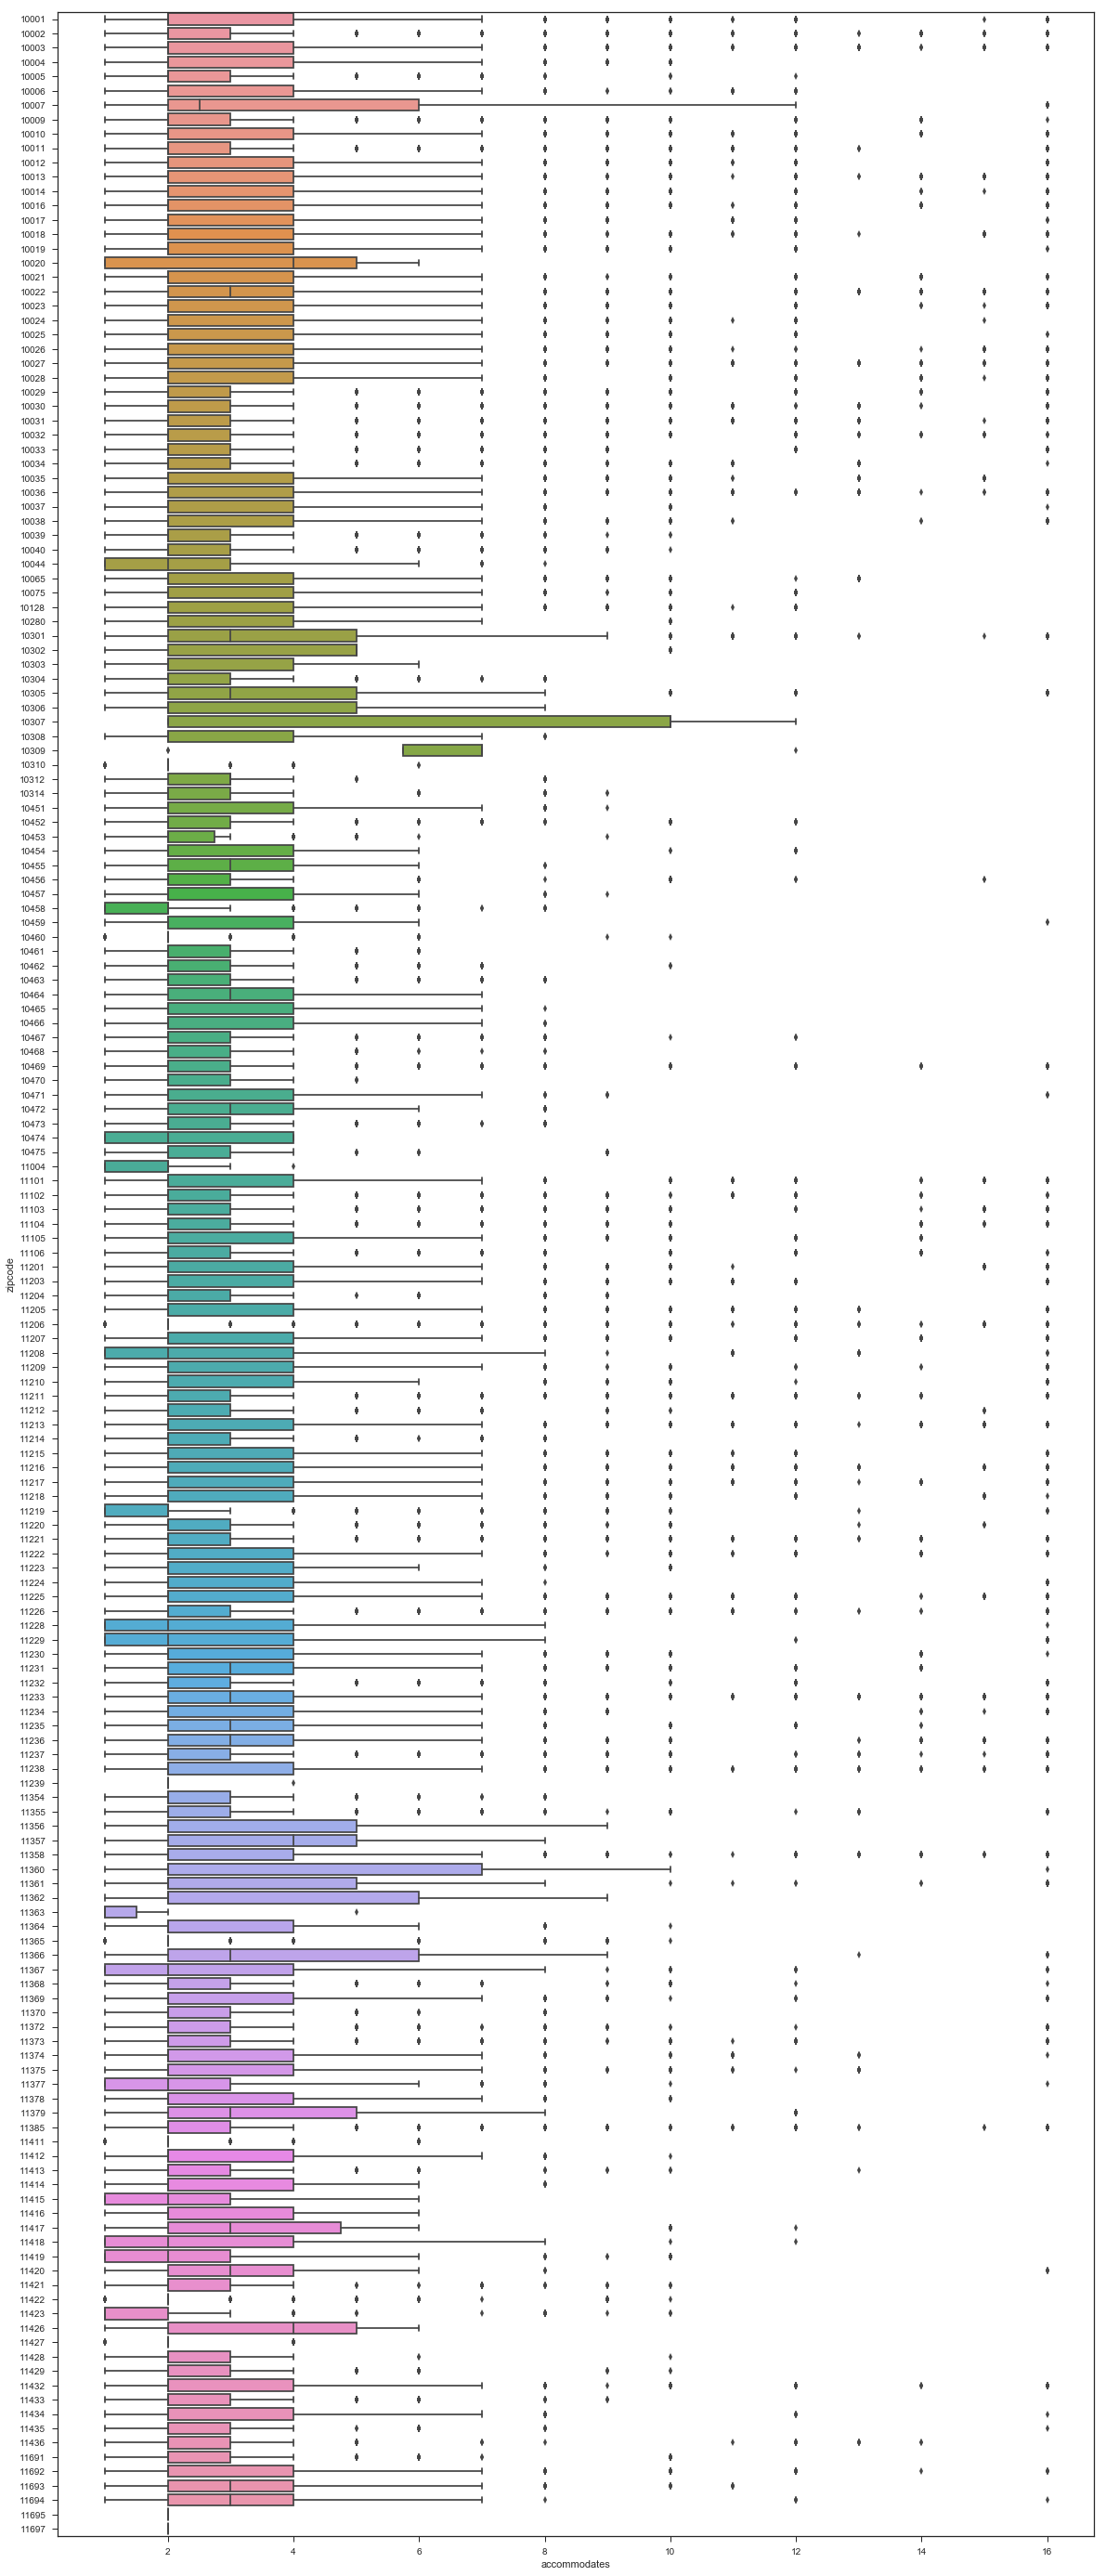

In [223]:
sns.set(style="ticks")
# Plot the Airbnb accomodation capacity
f, ax = plt.subplots(figsize=(20, 50))
sns.boxplot(x='accommodates', y="zipcode", data=airbnb, orient="h")
plt.show()

## 4. Which NYC zipcodes are popular Airbnb locations?

In the below bar graph, it becomes apparent that particular zipcodes attracted Airbnb hosts throughout the 2015-2017 period. The top 3 zipcodes are 11211, 10002, and 11206. Respectively, these neighborhoods are Williamsburg/Greenpoint in Brooklyn, Lower East Side in Manhattan, and  Bushwick/Williamsburg in Brooklyn. If you look at these areas on the map, they are located at both ends of the Williamsburg Bridge.

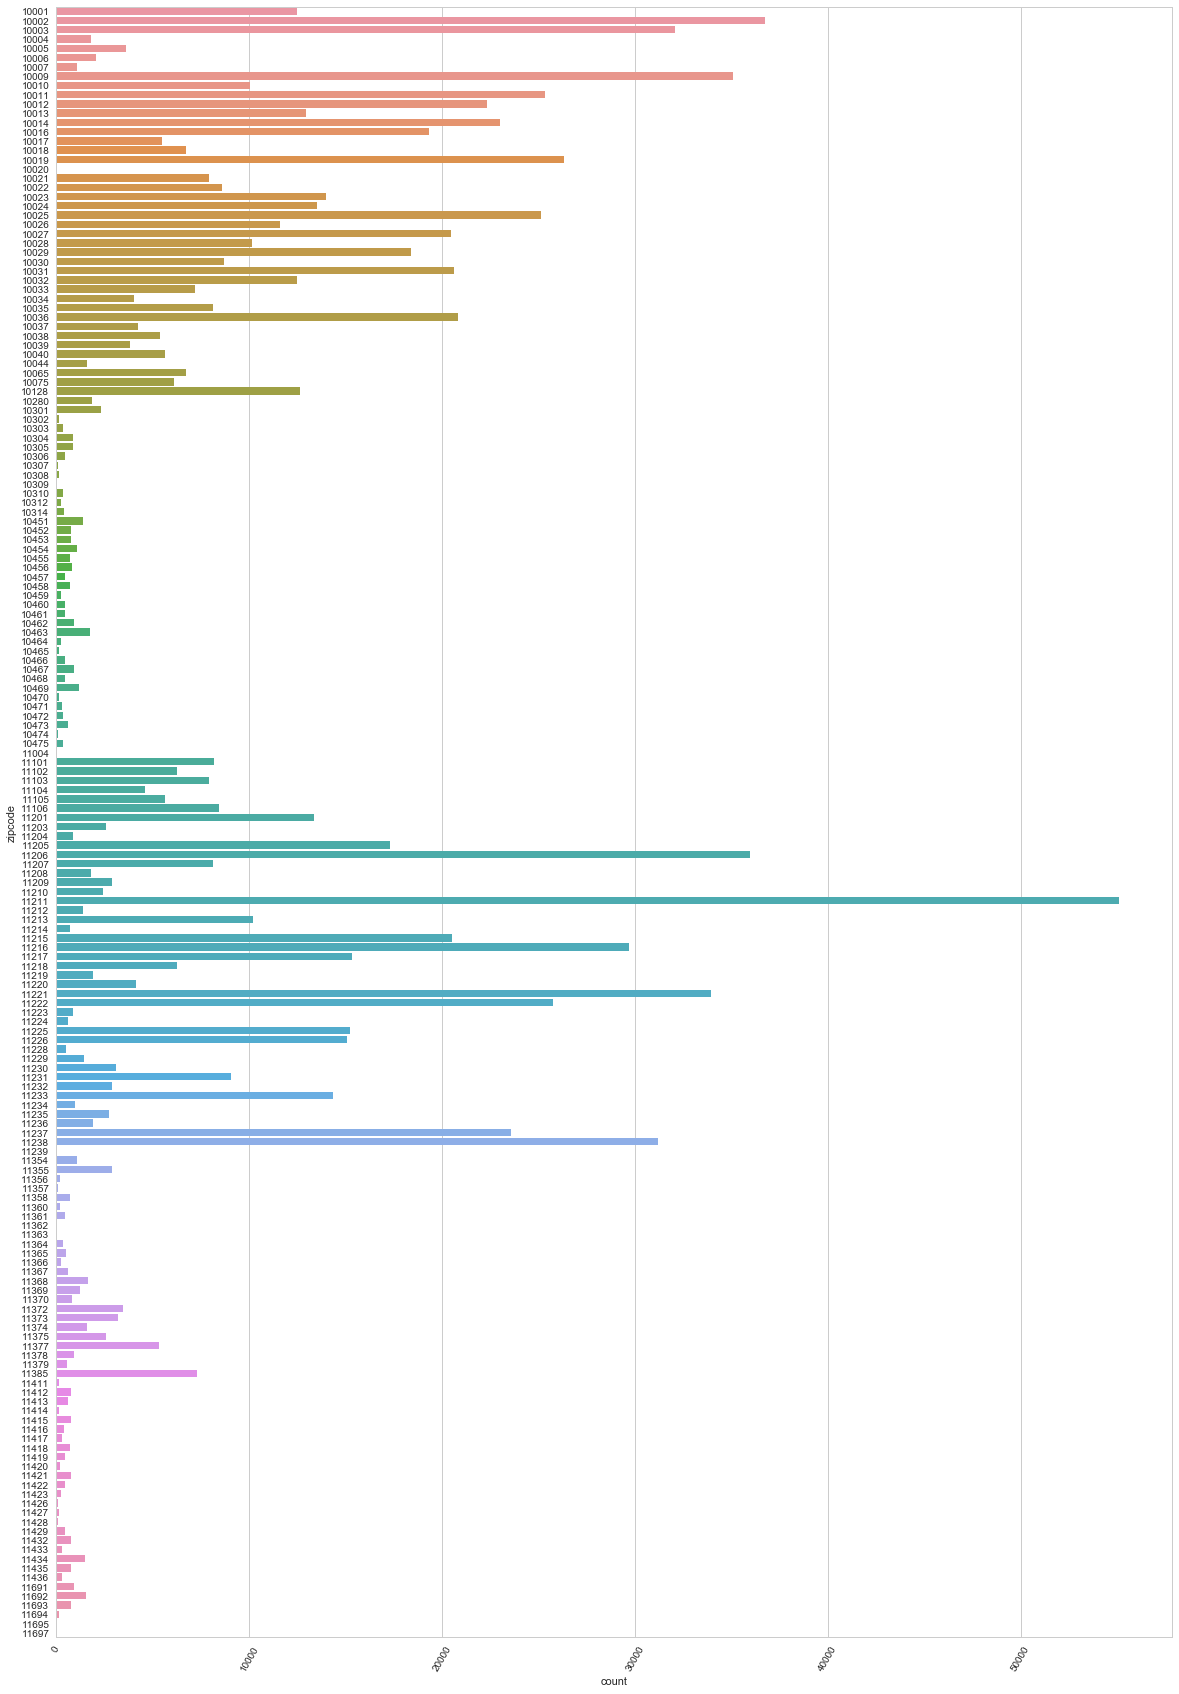

In [101]:
#Look at all NYC Airbnb's zipcodes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
sns.countplot(y="zipcode", data=airbnb)
plt.xticks(rotation=60)
mpl.rcParams['figure.figsize'] = (20,30)
# plt.xscale('log')
plt.show()

When separating the Airbnb listings by borough, we notice that a majority of NYC's Airbnbs are located in Manhattan and Brooklyn while the least amount are in Staten Island. The popularity of Airbnb in Brooklyn and Manhattan is probably due to these zipcodes' proximity to tourist attractions. 

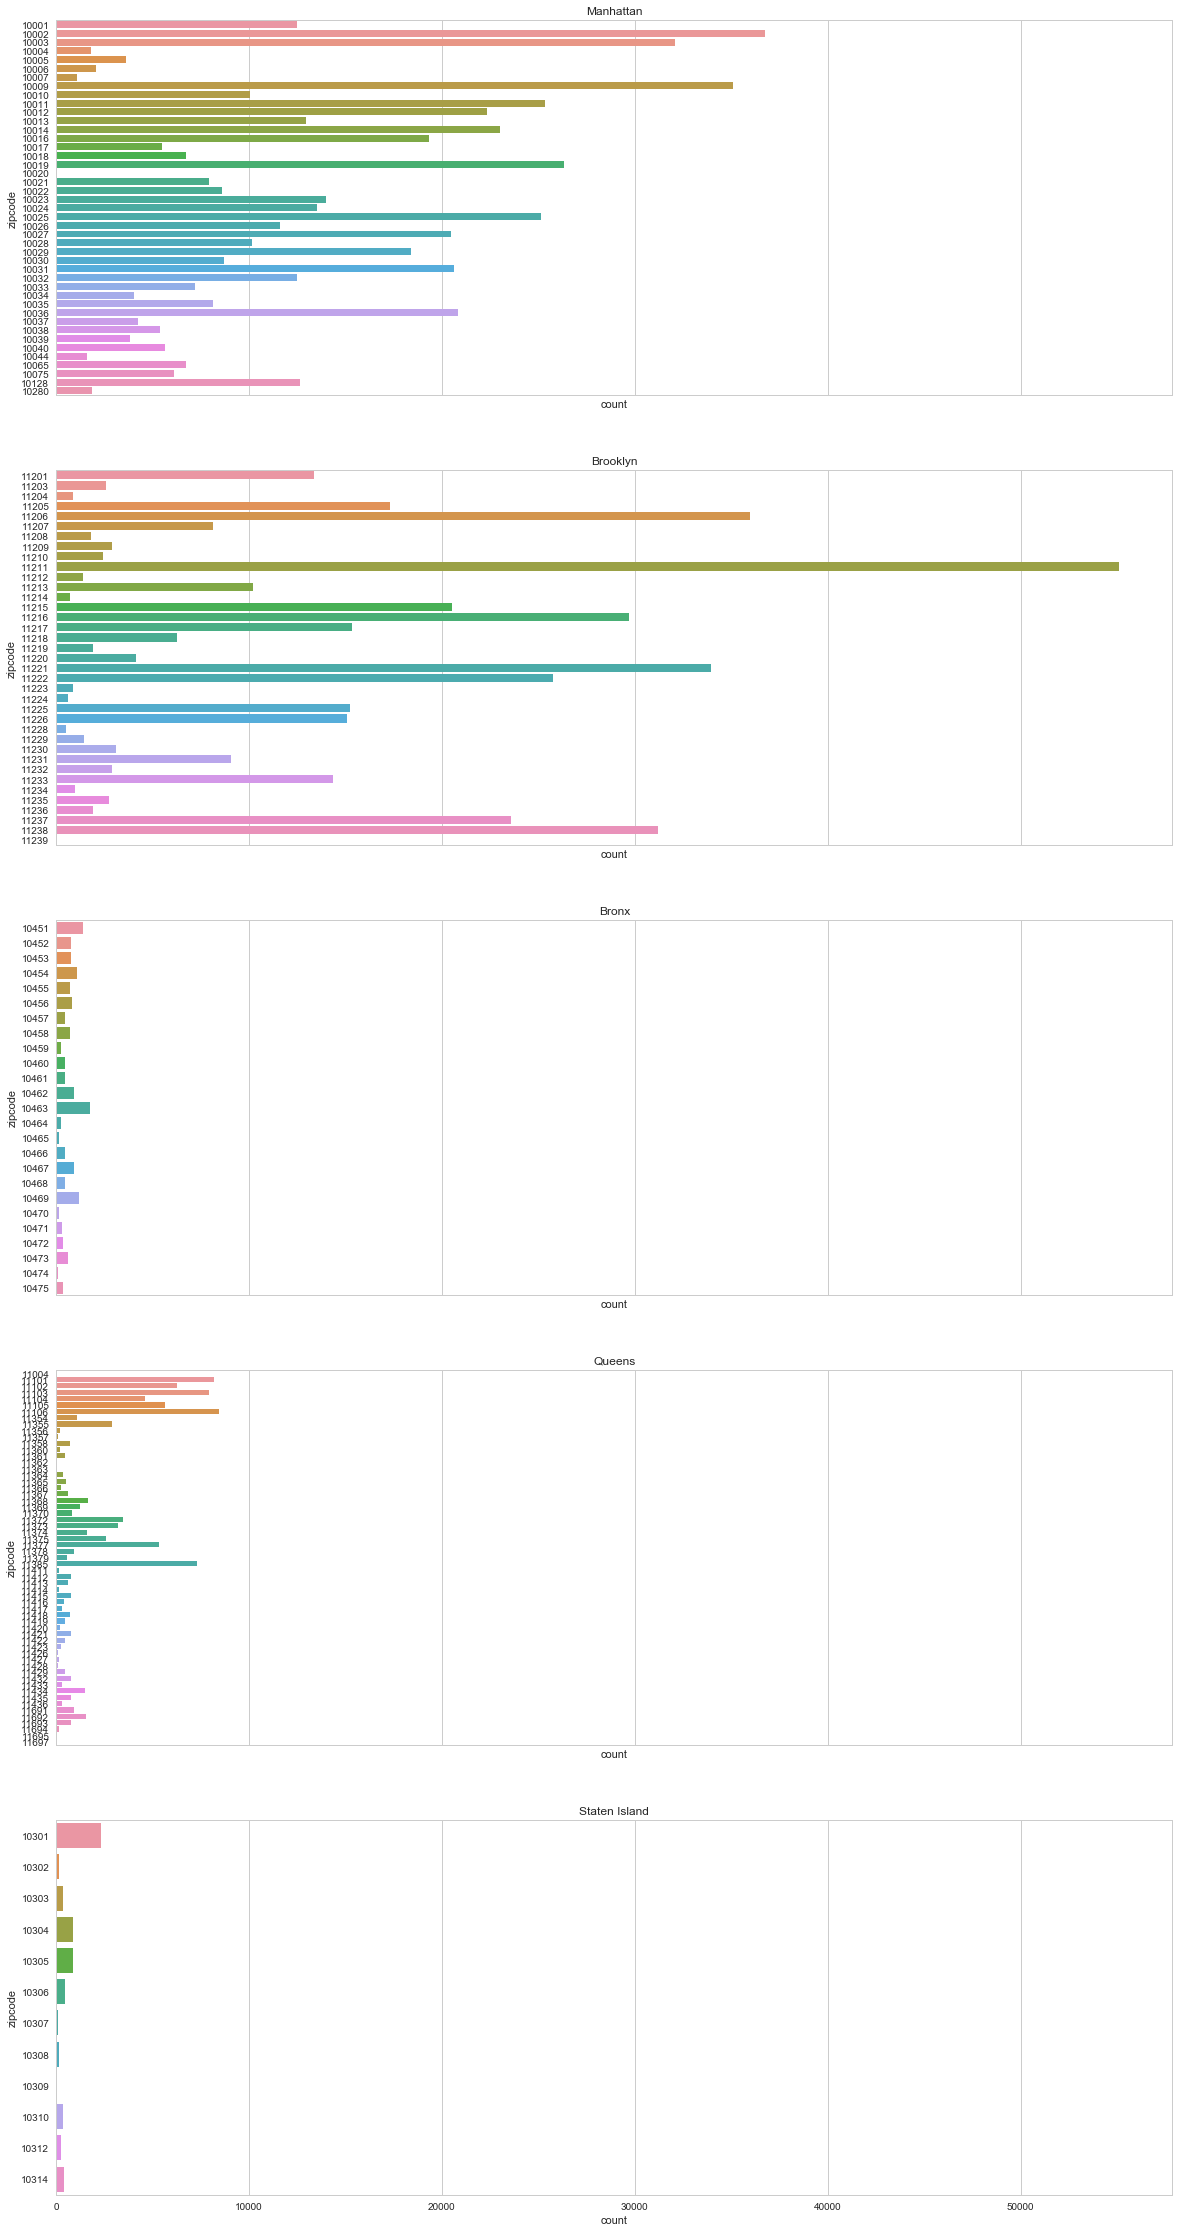

In [231]:
#NYC Airbnb's roomtypes from 2015-2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40),sharex=True)

sns.set(style="whitegrid", color_codes=True)

manhattan_zips = ['10026', '10027', '10030', '10037', '10039','10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040']
manhattan = airbnb[airbnb['zipcode'].isin(manhattan_zips)]
ax1.set_title("Manhattan")
sns.countplot(y="zipcode", data=manhattan, ax=ax1)

brooklyn_zips = ['11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237']
brooklyn = airbnb[airbnb['zipcode'].isin(brooklyn_zips)]
ax2.set_title("Brooklyn")
sns.countplot(y="zipcode", data=brooklyn, ax=ax2)

bronx_zips = ['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462','10464', '10465', '10472', '10473']
bronx = airbnb[airbnb['zipcode'].isin(bronx_zips)]
sns.countplot(y="zipcode", data=bronx, ax=ax3)
ax3.set_title("Bronx")

queens_zips = ['11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378']
queens = airbnb[airbnb['zipcode'].isin(queens_zips)]
sns.countplot(y="zipcode", data=queens, ax=ax4)
ax4.set_title("Queens")

staten_zips = ['10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
staten = airbnb[airbnb['zipcode'].isin(staten_zips)]
sns.countplot(y="zipcode", data=staten, ax=ax5)
ax5.set_title("Staten Island")

plt.show()

Below are violin plots of the same data.

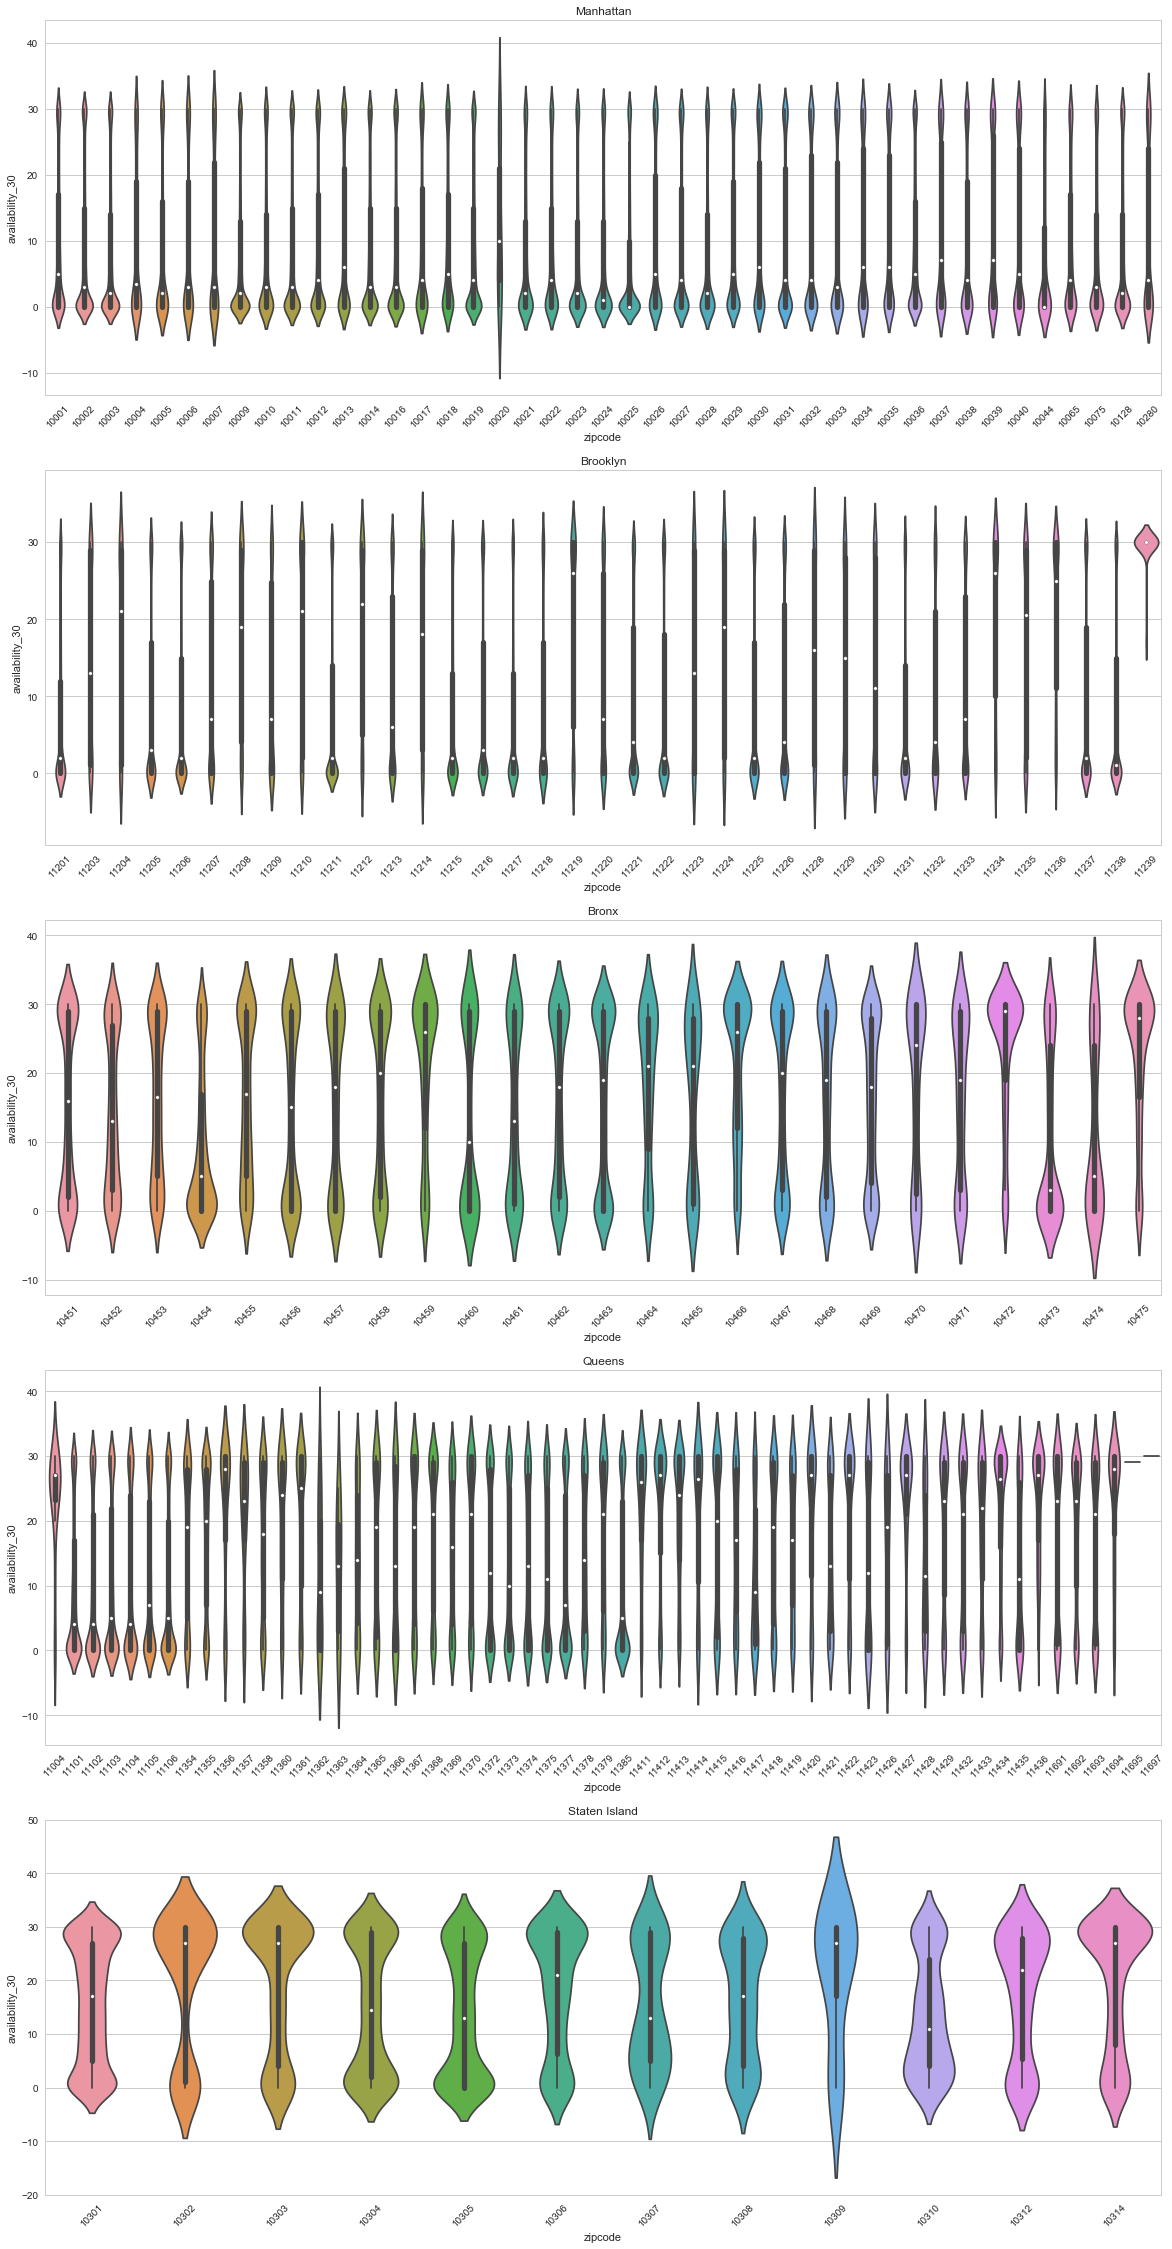

In [250]:
#NYC Airbnb's roomtypes from 2015-2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40))

sns.set(style="whitegrid", color_codes=True)

ax1.set_title("Manhattan")
sns.violinplot(x="zipcode",y="availability_30", data = manhattan, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2.set_title("Brooklyn")
sns.violinplot(x="zipcode",y="availability_30", data = brooklyn, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

sns.violinplot(x="zipcode",y="availability_30", data = bronx, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Bronx")

sns.violinplot(x="zipcode",y="availability_30", data = queens, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_title("Queens")

sns.violinplot(x="zipcode",y="availability_30", data = staten, ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
ax5.set_title("Staten Island")

plt.show()

## Airbnb prices in NYC zipcodes (OG5)

A majority of medians seem to fall between $50-300 range. Zipcode 10309 has a noticeably higher median, which may be related to the higher accomodation capacities we noticed in that zipcode in an earlier figure.


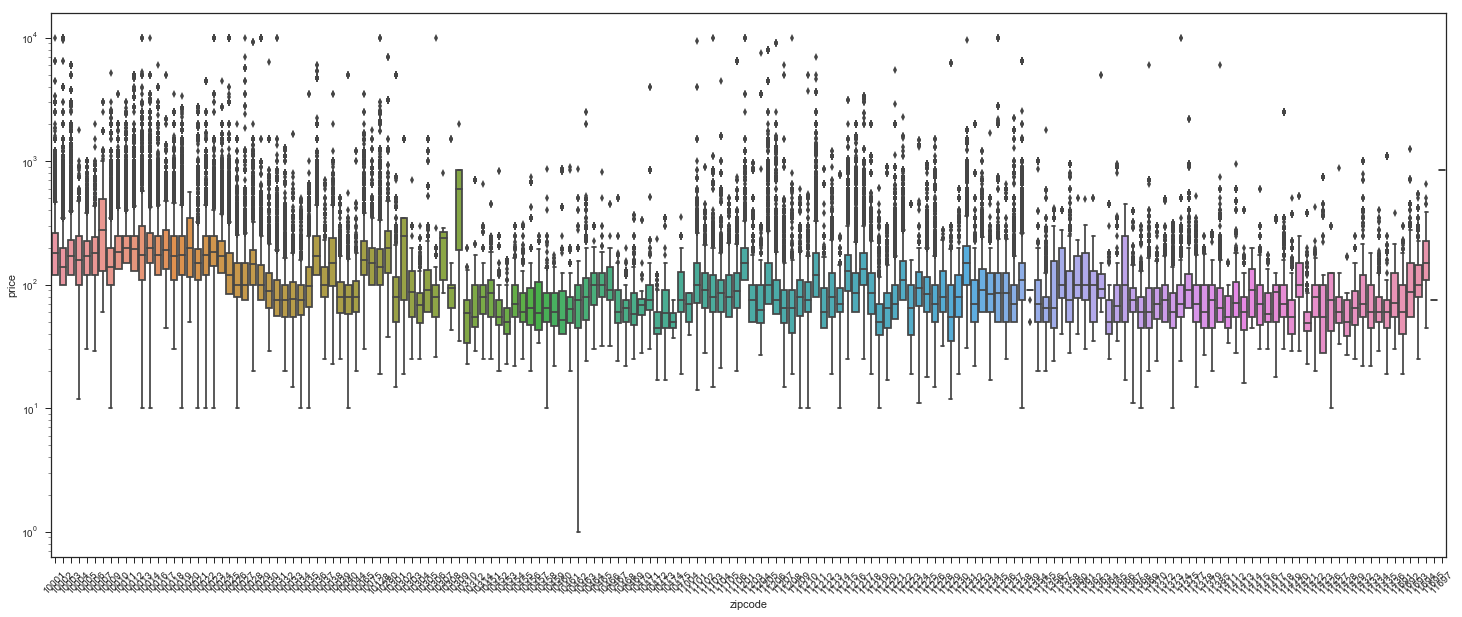

In [133]:
sns.set(style="ticks")
# Plot the Airbnb prices
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(25, 10))
ax.set_yscale("log")
sns.boxplot(x='zipcode', y="price", data=airbnb)
plt.xticks(rotation=45)
plt.show()

# # Add in points to show each observation
# sns.swarmplot(x="price", y="zipcode", data=airbnb,
#               size=2, color=".3", linewidth=0)



Below are the same boxplots separated by borough for closer looks at the data. Note that even Bronx outliers stay within the 10^3 range, while the other boroughs' outliers extend to 10^4.

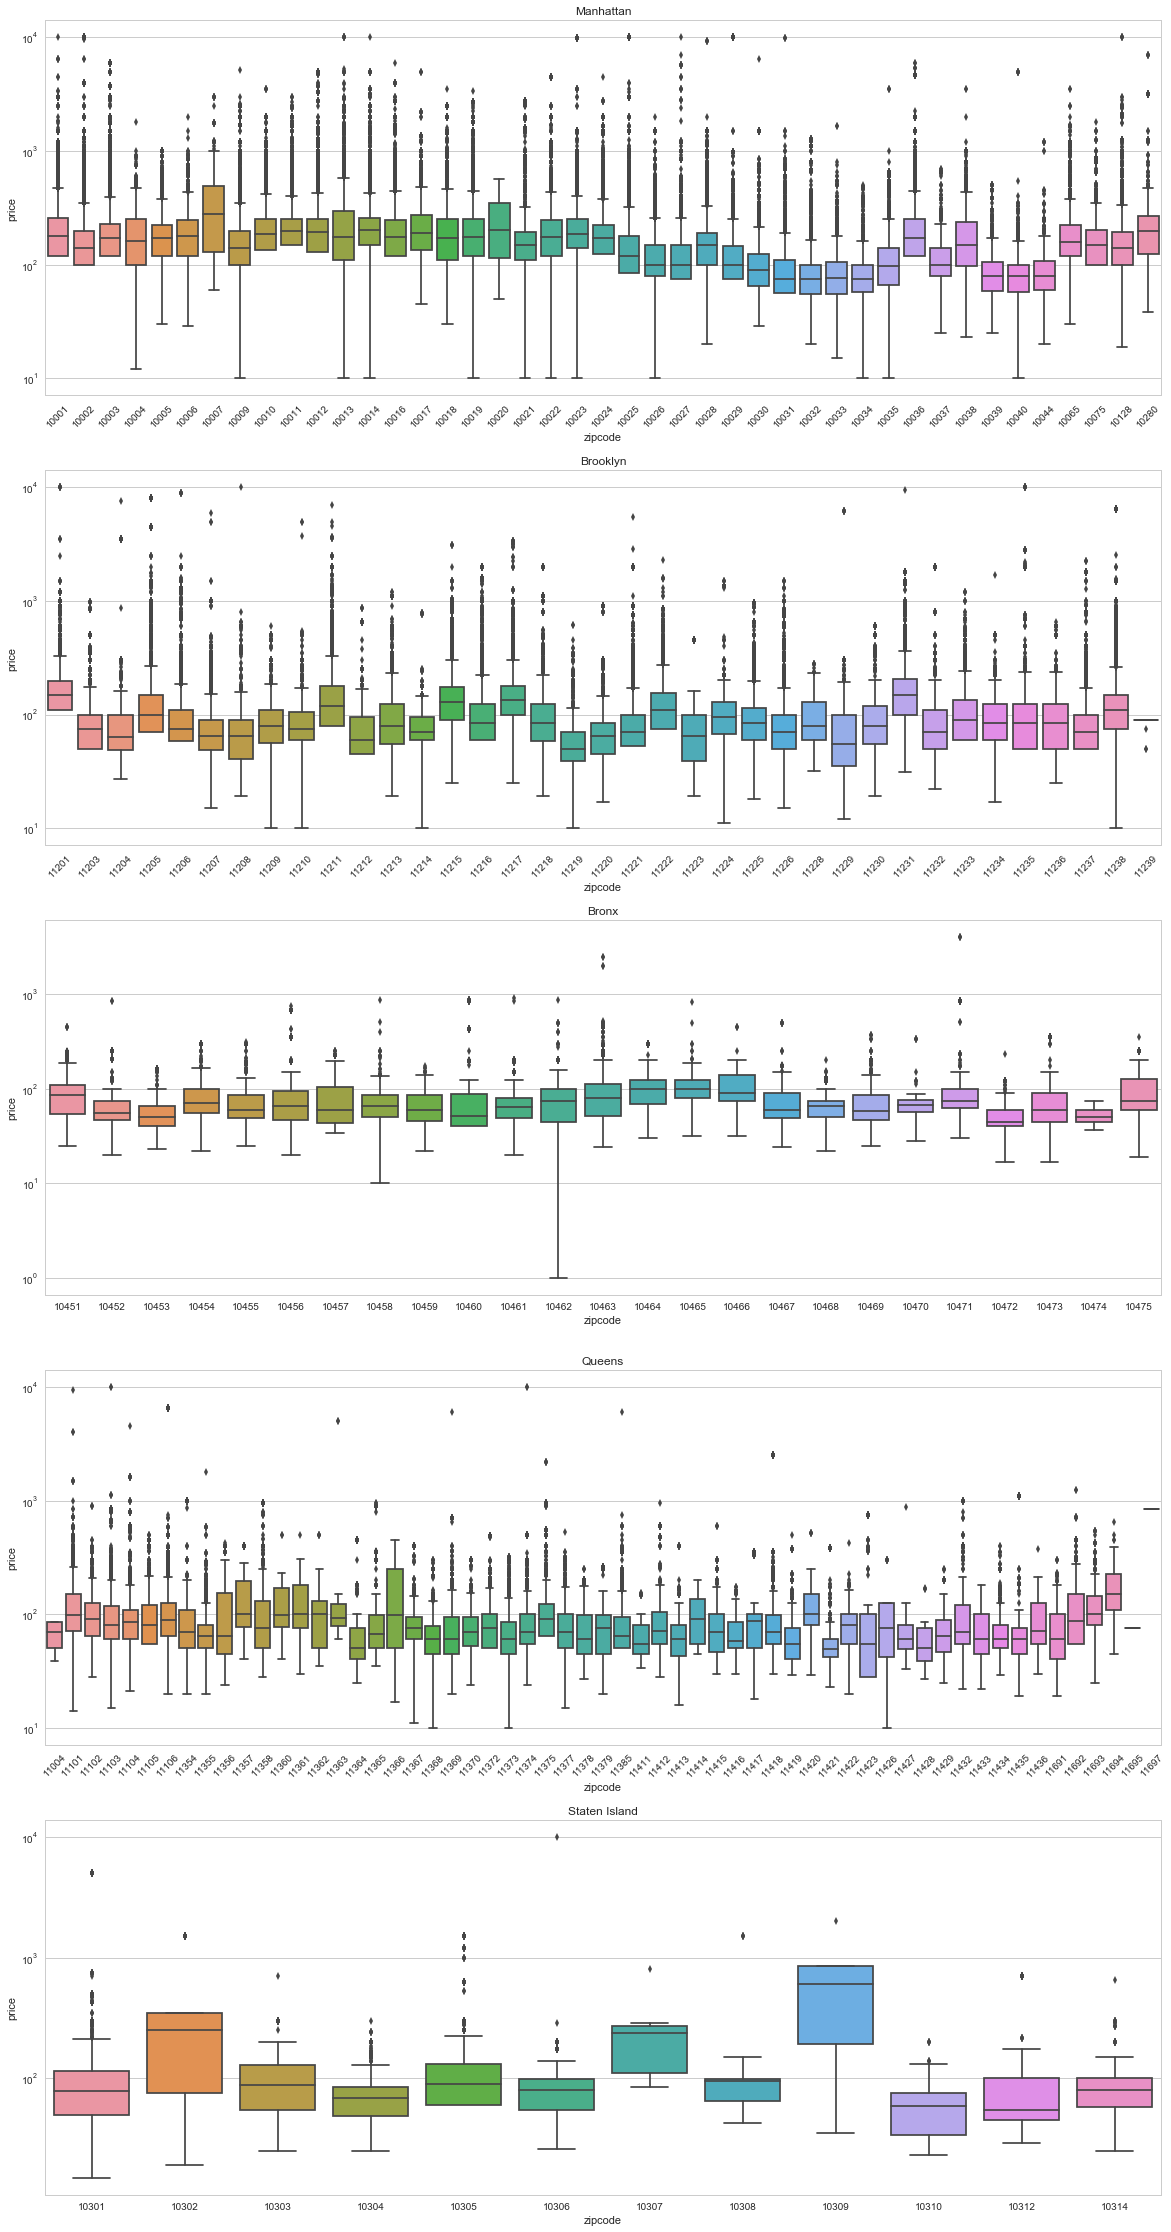

In [246]:
#NYC Airbnb's prices by borough
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40))

sns.set(style="whitegrid", color_codes=True)

ax1.set_title("Manhattan")
ax1.set_yscale("log")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
sns.boxplot(x='zipcode', y="price", data=manhattan, ax=ax1)

ax2.set_title("Brooklyn")
ax2.set_yscale("log")
sns.boxplot(x='zipcode', y="price", data=brooklyn, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

sns.boxplot(x='zipcode', y="price", data=bronx, ax=ax3)
ax3.set_yscale("log")
ax3.set_title("Bronx")

sns.boxplot(x='zipcode', y="price", data=queens, ax=ax4)
ax4.set_yscale("log")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax4.set_title("Queens")

sns.boxplot(x='zipcode', y="price", data=staten, ax=ax5)
ax5.set_yscale("log")
ax5.set_title("Staten Island")

plt.show()

Below is the same data shown in scatter plots. Note that zipcodes are discontinuous for Manhattan and Queens unlike the other boroughs.

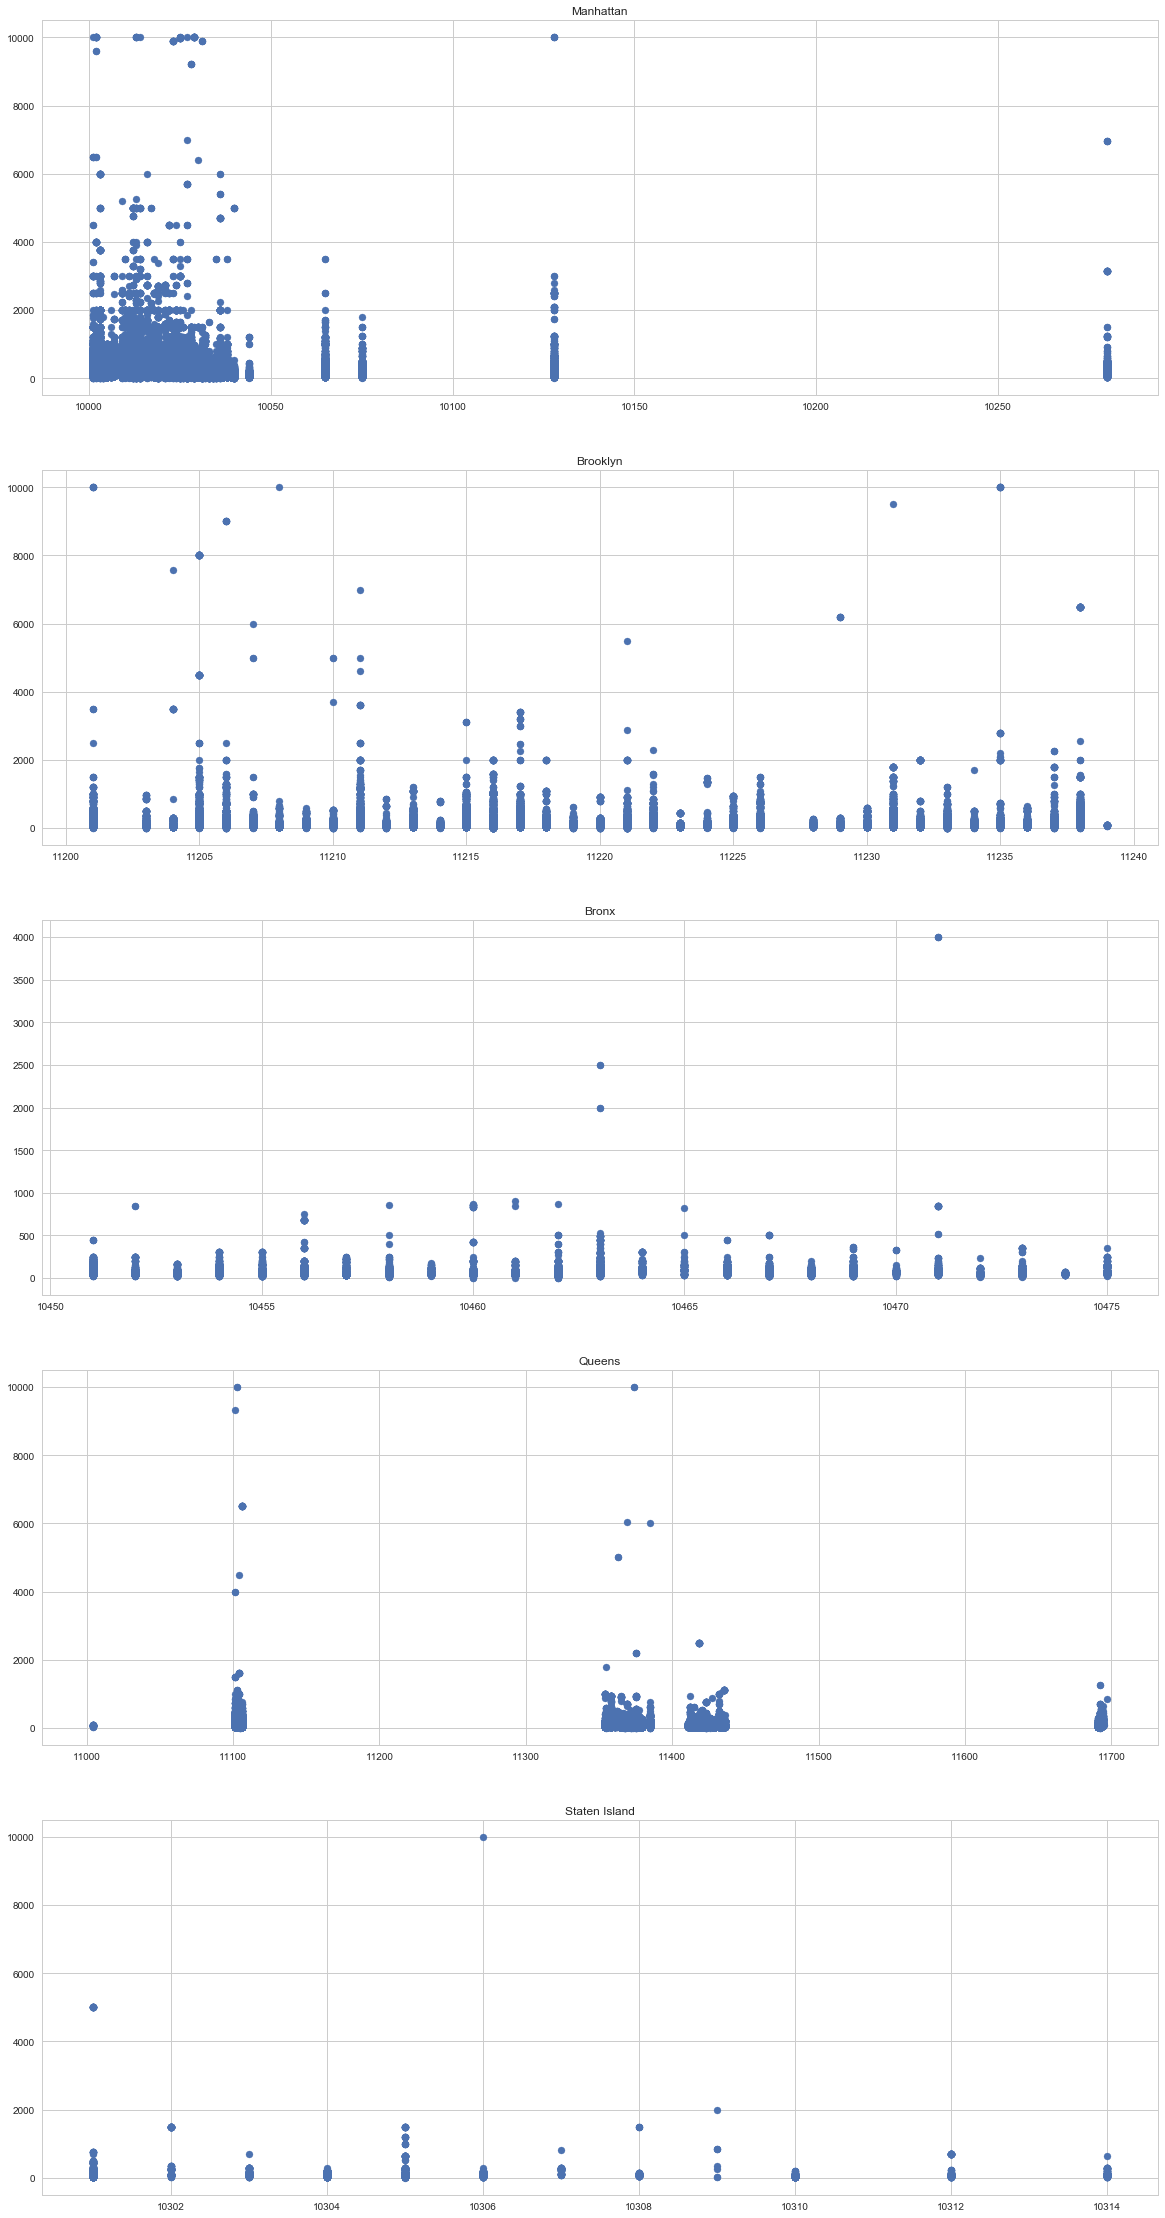

In [245]:
#NYC Airbnb's prices from 2015-2017 period
fig = plt.figure()
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(20,40))

sns.set(style="whitegrid", color_codes=True)

ax1.set_title("Manhattan")
mzip = manhattan['zipcode']
mprice = manhattan['price']
ax1.scatter(x=mzip, y=mprice)

ax2.set_title("Brooklyn")
bkzip = brooklyn['zipcode']
bkprice = brooklyn['price']
ax2.scatter(x=bkzip, y=bkprice)

bxzip = bronx['zipcode']
bxprice = bronx['price']
ax3.scatter(x=bxzip, y=bxprice)
ax3.set_title("Bronx")

qzip = queens['zipcode']
qprice = queens['price']
ax4.scatter(x=qzip, y=qprice)
ax4.set_title("Queens")

szip = staten['zipcode']
sprice = staten['price']
ax5.scatter(x=szip, y=sprice)
ax5.set_title("Staten Island")

plt.show()

## 6. What does Airbnb availability look like in a few zipcodes? 

There appears to be a seasonality in terms of availability for the areas near Williamsburg. May need to normalize other data because of the vast difference in scales.

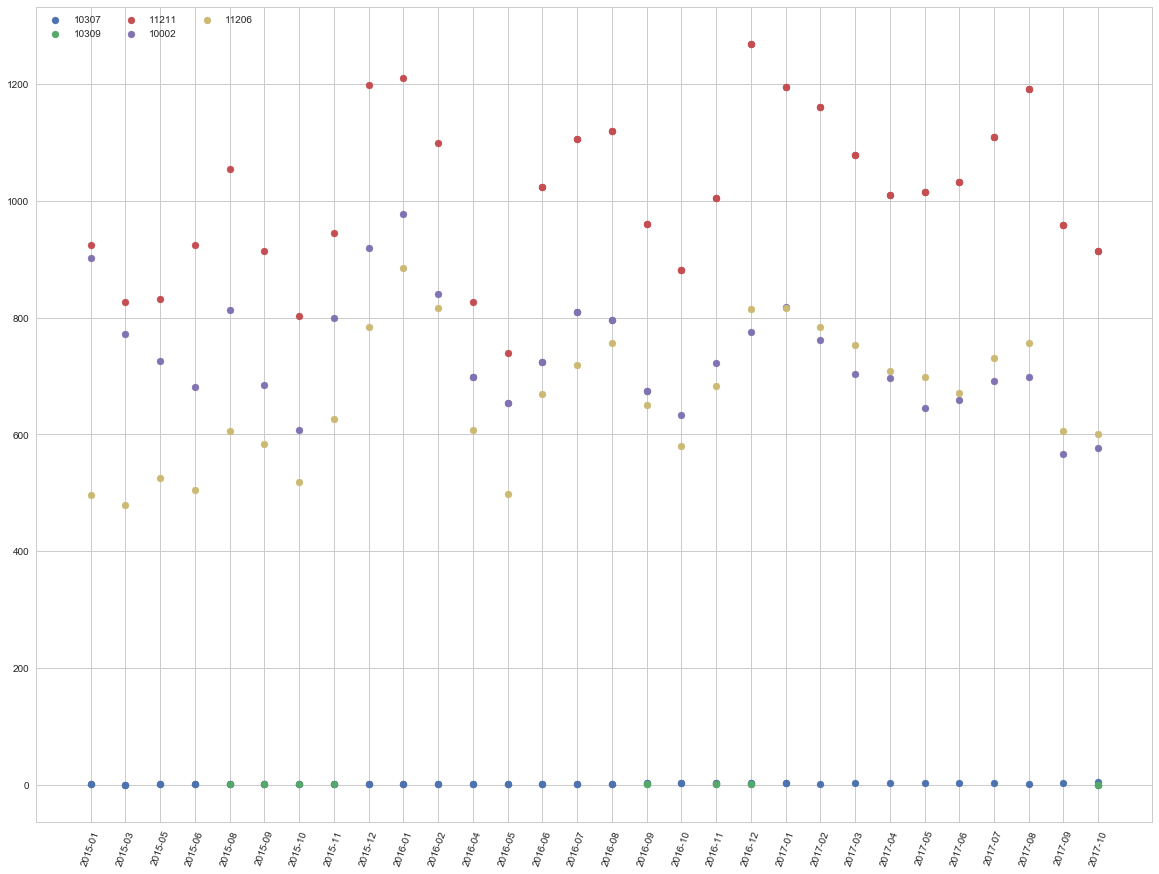

In [280]:
#Zipcode with a large range for accommodation capacity
x10307 = air_zillow.loc[air_zillow['zip'] == 10307]['date']
y10307 = air_zillow.loc[air_zillow['zip'] == 10307]['active_count']
act10307 = plt.scatter(x10307, y10307)
plt.xticks(rotation=70)

#Zipcode with a high median price for Airbnb
x10309 = air_zillow.loc[air_zillow['zip'] == 10309]['date']
y10309 = air_zillow.loc[air_zillow['zip'] == 10309]['active_count']
act10309 = plt.scatter(x10309, y10309)

#Zipcode for Williamsburg (the most airbnbs in a zipcode)
x11211 = air_zillow.loc[air_zillow['zip'] == 11211]['date']
y11211 = air_zillow.loc[air_zillow['zip'] == 11211]['active_count']
act11211 = plt.scatter(x11211, y11211)

#Zipcode for Lower East Side (one of the top 3 most)
x10002 = air_zillow.loc[air_zillow['zip'] == 10002]['date']
y10002 = air_zillow.loc[air_zillow['zip'] == 10002]['active_count']
act10002 = plt.scatter(x10002, y10002)

#Zipcode for East Williamsburg (one of the top 3 most)
x11206 = air_zillow.loc[air_zillow['zip'] == 11206]['date']
y11206 = air_zillow.loc[air_zillow['zip'] == 11206]['active_count']
act11206 = plt.scatter(x11206,y11206)

mpl.rcParams['figure.figsize'] = (20,15)
plt.legend((act10307, act10309, act11211, act10002, act11206),
           ('10307', '10309', '11211', '10002', '11206'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)


plt.show()



/Users/Administrator/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1a418b9a90>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/Administrator/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1a3b729438>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/Administrator/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:623: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1a3b729a20>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle

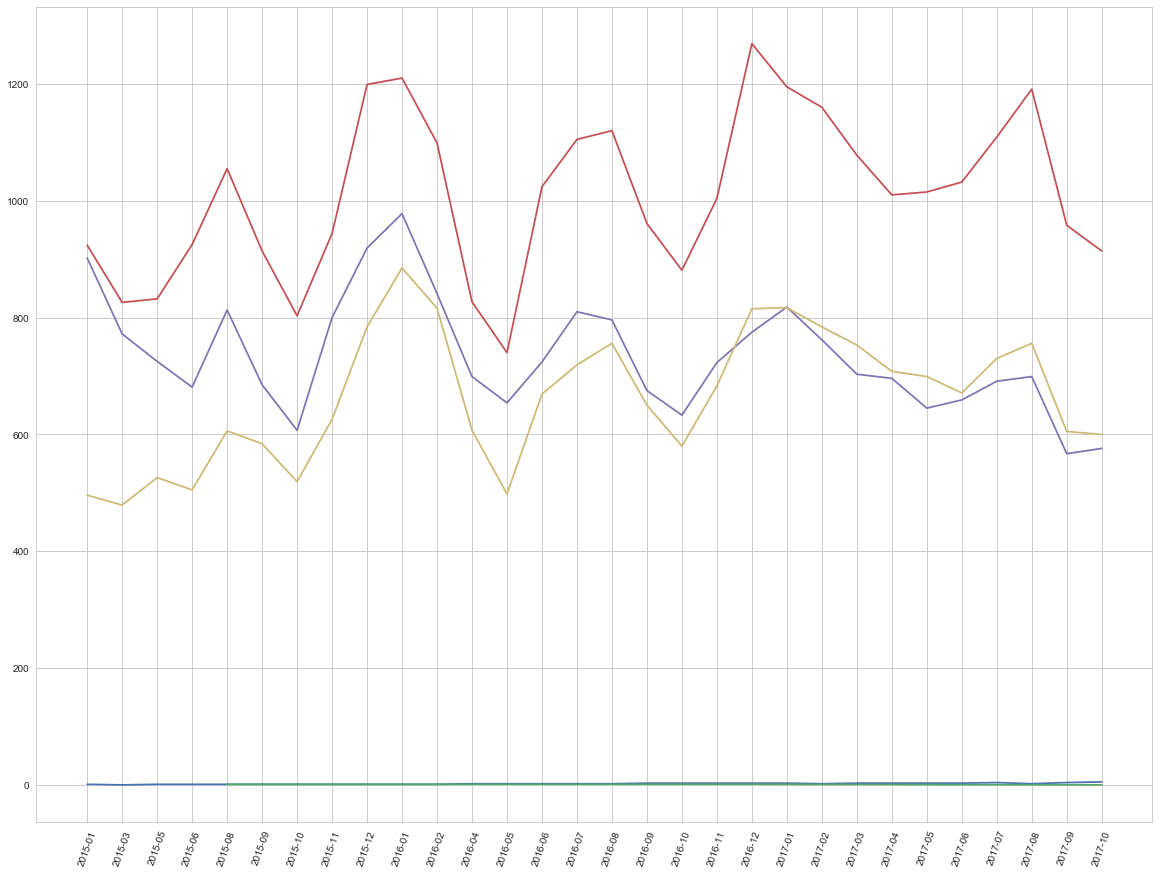

In [283]:
#Zipcode with a large range for accommodation capacity
x10307 = air_zillow.loc[air_zillow['zip'] == 10307]['date']
y10307 = air_zillow.loc[air_zillow['zip'] == 10307]['active_count']
act10307 = plt.plot(x10307, y10307)
plt.xticks(rotation=70)

#Zipcode with a high median price for Airbnb
x10309 = air_zillow.loc[air_zillow['zip'] == 10309]['date']
y10309 = air_zillow.loc[air_zillow['zip'] == 10309]['active_count']
act10309 = plt.plot(x10309, y10309)

#Zipcode for Williamsburg (the most airbnbs in a zipcode)
x11211 = air_zillow.loc[air_zillow['zip'] == 11211]['date']
y11211 = air_zillow.loc[air_zillow['zip'] == 11211]['active_count']
act11211 = plt.plot(x11211, y11211)

#Zipcode for Lower East Side (one of the top 3 most)
x10002 = air_zillow.loc[air_zillow['zip'] == 10002]['date']
y10002 = air_zillow.loc[air_zillow['zip'] == 10002]['active_count']
act10002 = plt.plot(x10002, y10002)

#Zipcode for East Williamsburg (one of the top 3 most)
x11206 = air_zillow.loc[air_zillow['zip'] == 11206]['date']
y11206 = air_zillow.loc[air_zillow['zip'] == 11206]['active_count']
act11206 = plt.plot(x11206,y11206)

mpl.rcParams['figure.figsize'] = (20,15)
plt.legend((act10307, act10309, act11211, act10002, act11206),
           ('10307', '10309', '11211', '10002', '11206'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)


plt.show()


## 7. What do price to rent ratios look like in a few zipcodes?

From the scatterplot below, we notice that Williamsburg has generally higher price to rent ratios. This suggests that [renting is a more economically rational decision than buying a property in this area.](https://www.investopedia.com/terms/p/price-to-rent-ratio.asp). However, note that NYC is one of the top 10 cities in the United States for price-to-rent ratios.

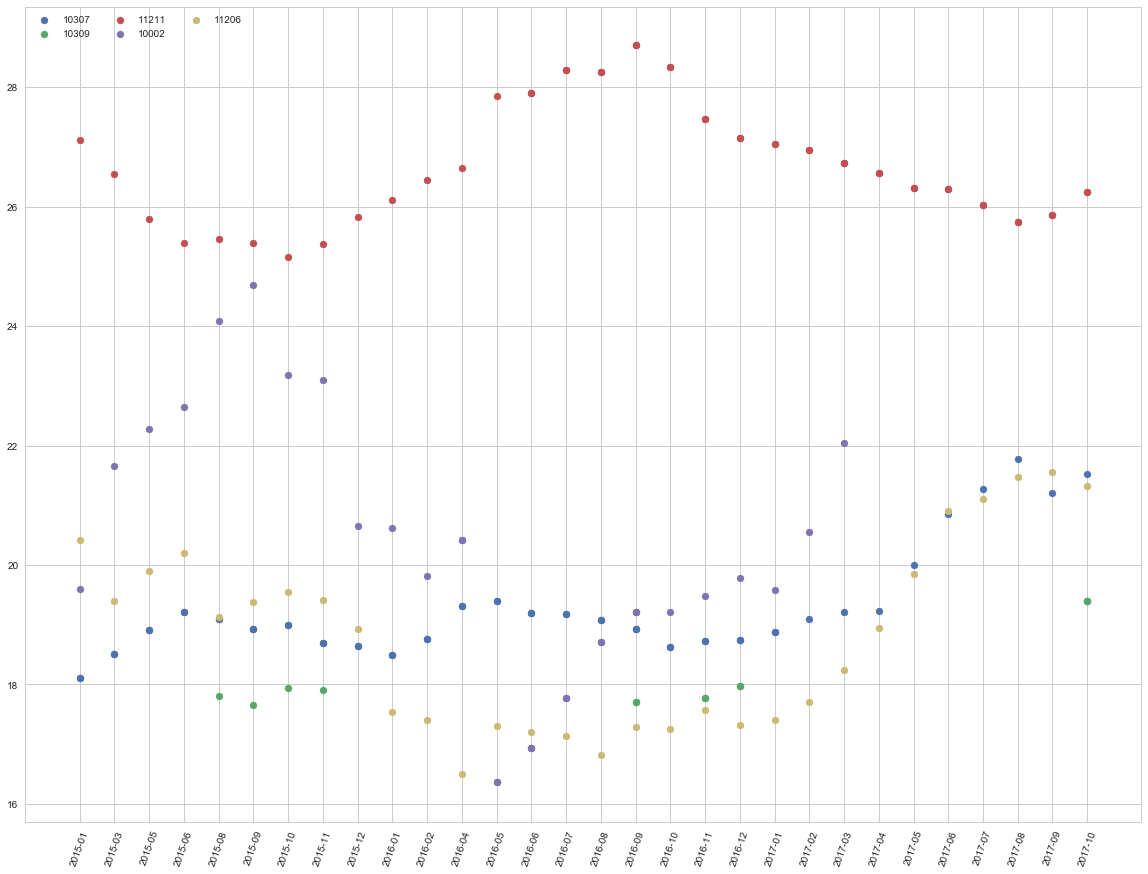

In [282]:
#Initial look at PRR data
sns.set(style="whitegrid", color_codes=True)


#Zipcode with a large range for accommodation capacity
prrx10307 = air_zillow.loc[air_zillow['zip'] == 10307]['date']
prry10307 = air_zillow.loc[air_zillow['zip'] == 10307]['pr_ratio']
prr10307 = plt.scatter(prrx10307, prry10307)
plt.xticks(rotation=70)

#Zipcode with a high median price for Airbnb
prrx10309 = air_zillow.loc[air_zillow['zip'] == 10309]['date']
prry10309 = air_zillow.loc[air_zillow['zip'] == 10309]['pr_ratio']
prr10309 = plt.scatter(prrx10309, prry10309)

#Zipcode for Williamsburg (the most airbnbs in a zipcode)
prrx11211 = air_zillow.loc[air_zillow['zip'] == 11211]['date']
prry11211 = air_zillow.loc[air_zillow['zip'] == 11211]['pr_ratio']
prr11211 = plt.scatter(prrx11211, prry11211)

#Zipcode for Lower East Side (one of the top 3 most)
prrx10002 = air_zillow.loc[air_zillow['zip'] == 10002]['date']
prry10002 = air_zillow.loc[air_zillow['zip'] == 10002]['pr_ratio']
prr10002 = plt.scatter(prrx10002, prry10002)

#Zipcode for East Williamsburg (one of the top 3 most)
prrx11206 = air_zillow.loc[air_zillow['zip'] == 11206]['date']
prry11206 = air_zillow.loc[air_zillow['zip'] == 11206]['pr_ratio']
prr11206 = plt.scatter(prrx11206,prry11206)

mpl.rcParams['figure.figsize'] = (20,15)
plt.legend((prr10307, prr10309, prr11211, prr10002, prr11206),
           ('10307', '10309', '11211', '10002', '11206'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)


plt.show()

From the line graph below of the Price to Rent Ratios, it appears that Williamsburg has a higher frequency of fluctuations when it comes to price to rent ratios. It also generally has higher price to rent ratios which suggests that [renting is a more economically rational decision than buying a property.](https://www.investopedia.com/terms/p/price-to-rent-ratio.asp).

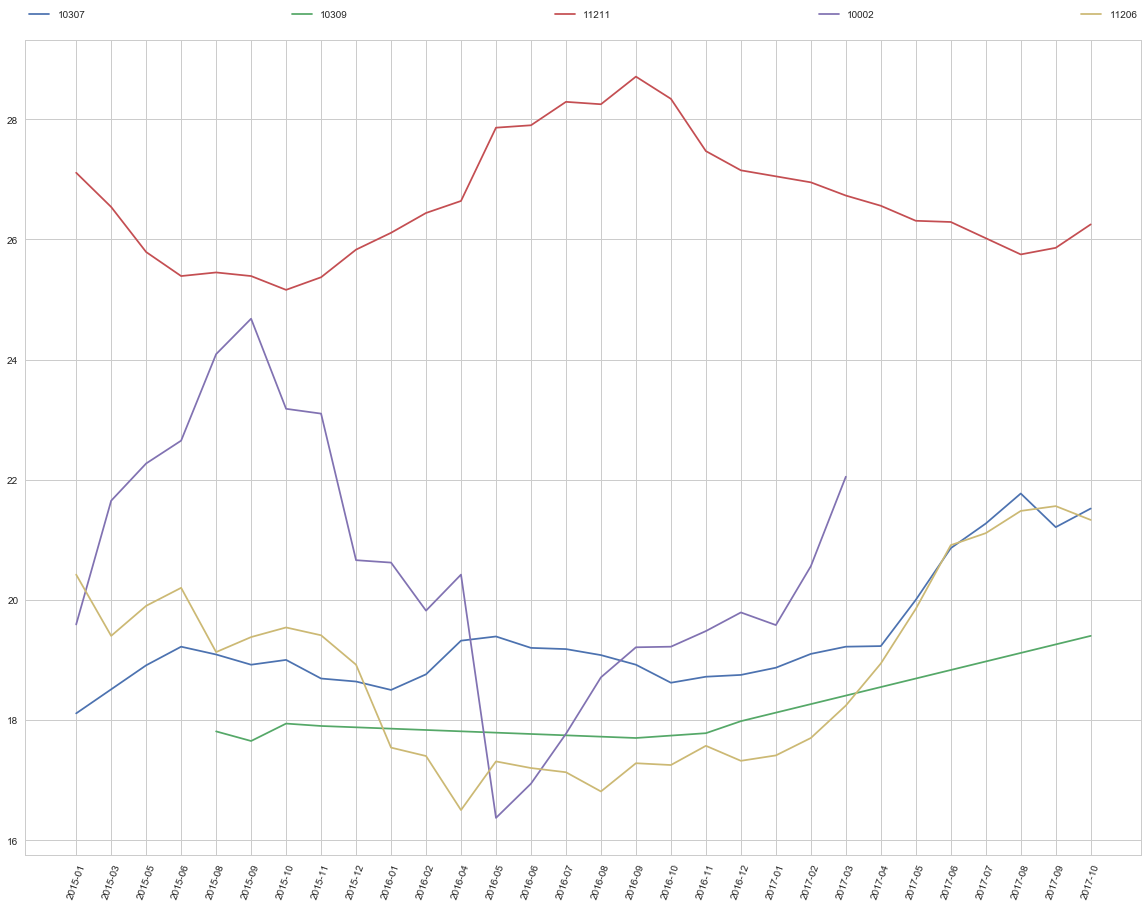

In [288]:
#Initial look at PRR data
sns.set(style="whitegrid", color_codes=True)


#Zipcode with a large range for accommodation capacity
prrx10307 = air_zillow.loc[air_zillow['zip'] == 10307]['date']
prry10307 = air_zillow.loc[air_zillow['zip'] == 10307]['pr_ratio']
prr10307 = plt.plot(prrx10307, prry10307, label = '10307')
plt.xticks(rotation=70)

#Zipcode with a high median price for Airbnb
prrx10309 = air_zillow.loc[air_zillow['zip'] == 10309]['date']
prry10309 = air_zillow.loc[air_zillow['zip'] == 10309]['pr_ratio']
prr10309 = plt.plot(prrx10309, prry10309, label = '10309')

#Zipcode for Williamsburg (the most airbnbs in a zipcode)
prrx11211 = air_zillow.loc[air_zillow['zip'] == 11211]['date']
prry11211 = air_zillow.loc[air_zillow['zip'] == 11211]['pr_ratio']
prr11211 = plt.plot(prrx11211, prry11211, label = '11211')

#Zipcode for Lower East Side (one of the top 3 most)
prrx10002 = air_zillow.loc[air_zillow['zip'] == 10002]['date']
prry10002 = air_zillow.loc[air_zillow['zip'] == 10002]['pr_ratio']
prr10002 = plt.plot(prrx10002, prry10002, label = '10002')

#Zipcode for East Williamsburg (one of the top 3 most)
prrx11206 = air_zillow.loc[air_zillow['zip'] == 11206]['date']
prry11206 = air_zillow.loc[air_zillow['zip'] == 11206]['pr_ratio']
prr11206 = plt.plot(prrx11206,prry11206, label = '11206')

mpl.rcParams['figure.figsize'] = (20,15)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)


plt.show()